# Unit 1: Ordinary differential equations, Lecture 2

In this lecture we'll learn some common tools, both analytical and numerical, for analyzing ODE models. 


**Announcements.**

- Group formation page - see Canvas.
- Assignment 1 has been posted to Canvas. 
- See Project Info page on Canvas, for additional materials 
    - Project Instructions
    - Problem Statement handout
    - LaTeX template
    - project ideas
    - example projects
- GenAI policy -- still editting -- will send out survey to find out how you would like to use it. 

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as la
import matplotlib.pyplot as plt

## Resources
- [Math 360: Nondimensionalization](https://ubcmath.github.io/MATH360/deterministic/nondimensionalization/index.html)
- [Math 360: Numerical Solutions with SciPy](https://ubcmath.github.io/MATH360/deterministic/differential/systems.html#numerical-solutions-with-scipy)
- [Math 360: Linear stability analysis](https://ubcmath.github.io/MATH360/deterministic/differential/systems.html#linear-stability-analysis)
- [Mathematical Python: Systems of equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/)
- [Diffy Q's: Linearization, critical points, and equilibria](https://www.jirka.org/diffyqs/html/linearization_section.html)
- [Diffy Q's: Stability and classification of isolated critical points](https://www.jirka.org/diffyqs/html/nlinstability_section.html)

## Nondimensionalization

It is a very good idea to nondimenisonalize an ODE model, so you can see how many parameters you *actually* have. 

### Example: nonlinear drag equation.

Recall the nonlinear drag equation for an object falling through air is
$$m\frac{dv}{dt} = mg - \alpha v^2, \qquad v(0) = v_0.$$
where
- $v$ = velocity of object
- $t$ = time
- $m$ = mass of object
- $g = 9.8m/s^2$ = gravitational acceleration constant
- $\alpha$ = drag coefficient, due to air resistance

We have 2 variables: $v,t$. 
It might look like we have 4 parameters: $m,g,\alpha,v_0$. Let's nondimensionalize the model and see how many parameters the model *actually* has. 

We follow the nondimensionalization procedure from [Math 360](https://ubcmath.github.io/MATH360/deterministic/nondimensionalization/index.html). 

1. The units of the variables are
  - $[v] = $ length/time
  - $[t] = $ time
Note that we use the symbol $[\cdot]$ to mean "units of $\cdot$". 

2. Replace each variable with a nondimensional variable: 
$$v = Vv^*, \qquad t = Tt^*$$
where here $V,T$ are typical scales of velocity and time.
This gives ODE
$$\frac{mV}{T}\frac{dv^*}{dt^*} = mg - \alpha V^2 (v^*)^2, \qquad Vv^*(0) = v_0.$$

3. Divide all equations in the model by the coefficient of one of the terms in the model. Often, it is convenient to choose the coefficient of the highest order polynomial or derivative term. 
$$\frac{dv^*}{dt^*} = \frac{Tg}{V} - \frac{\alpha VT}{m} (v^*)^2, \qquad v^*(0) = \frac{v_0}{V}.$$

4. Choose the scaling factor for each variable so that the coefficients (nondimensional parameter groups) of as many terms as possible become 1.

Here we have 2 nondimensional parameter groups:
$$\frac{Tg}{V}, \qquad \frac{\alpha VT}{m}.$$
(Plus we have the initial condition  $\frac{v_0}{V}$, but this doesn't count as a parameter, rather it is an initial condition. But we still keep it in the nondimensionalization.)
We hve 2 scales to choose, so we can set both of these nondimensional parameter groups to be 1. 

*Note: as a check that we have done our nondimensionalisation correctly, we should check the dimensions of these quantities, and verify that they are indeed nondimensional. We have, using SI units,*
- $\left[\frac{Tg}{V}\right] = \frac{s \cdot (m/s^2)}{m/s} = $ unitless 
- $\left[\frac{\alpha VT}{m}\right] = \frac{(kg\cdot m^{-1}) \cdot (m/s) \cdot s}{kg}$ = unitless
- $\left[ \frac{v_0}{V} \right] = \frac{m/s}{m/s}=$ unitless

*Thus, so far the units of our calculations are all correct, so the calculations are more likely to be correct.*

**Question:** what would you do if you didn't know the units of $\alpha$? How could you determine them from the equation? 

We will set both nondimensional parameter groups equal to 1: 
$$\frac{Tg}{V}=1, \qquad \frac{\alpha VT}{m}=1.$$
Solving gives
$$V = \sqrt{\frac{gm}{\alpha}}, \qquad T = \sqrt{\frac{m}{\alpha g}}.$$
Then, the initial condition is
$$\delta \equiv \frac{v_0}{\sqrt{gm/\alpha}}.$$

The scales have a physical interpretation: 
- $V = \sqrt{\frac{gm}{\alpha}}$ is the *terminal velocity* of the object, i.e. the velocity is has once it reaches a steady-state velocity. You can verify this from the intial model, by solving for the value of $v$ such that $\frac{dv}{dt} = 1$. 
- $T$ is the timescale it takes to approach the terminal velocity.  
- $\delta$ is the fraction of the terminal velocity, that the system starts at. 

*Note: again, you can check here that your calculations are correct, by verifying the units of $V$, $T$ are correct.*

Substituting into the ODE gives
$$\frac{dv^*}{dt^*} = 1 - (v^*)^2, \qquad v^*(0) = \delta.$$
This is the nondimensional model. It contains *zero nondimensional parameters* -- thus, its behaviour is fully determined by the initial condition $\delta$. Thus,  the *only* thing that can change the behaviour of the model is this parameter, which measures how close the initial velocity is to the terminal velocity. 

Sometimes, when you get to this point, it is conventional to drop the *s, and write the model simply as
$$\frac{dv}{dt} = 1 - v^2, \qquad v(0) = \delta.$$
You would point out explicitly in the text that you have dropped the *s. 


### Lotka-Volterra equation.
 Here are notes (from Math 360) on [nondimensionalizing the Lotka-Volterra equation](https://ubcmath.github.io/MATH360/deterministic/nondimensionalization/scaling.html#lotka-volterra-equations), as well as other examples considered in that course. 



### Exercise. [10 minutes, in-class]

Nondimensionalize the SIR model: 
$$\begin{aligned}
\frac{dS}{dt} &= -\beta SI\\
\frac{dI}{dt} &= \beta SI -\gamma I\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$
with initial conditions
$$S(0) = s_0, \quad I(0) = i_0, \quad R(0) = r_0.$$

Hint: It might help to use the total population $N=S+I+R$ as a scale at some point.

**Solution.** 

***INSERT***

## Numerically solving ODEs

It is very useful to be able to quickly solve ODEs numerically. 

You [learned in Math 360](https://ubcmath.github.io/MATH360/deterministic/differential/equations.html) how to write a numerical method to do this yourself, called **Euler's method**. This is the simplest possible method, but it is prone to numerical instabilities. You are always welcome to program Euler's method, or another numerical algorithm, yourself. (It is a good idea to review Euler's method, as we will come back to this in our unit on SDEs.)

Luckily Python (and many other high-level languages, e.g. Julia, Matlab, etc), have built-in ODE solvers that work well for most equations. You can make use of these built-in solvers in your projects. 
The core idea of each solver is to represent your ODE abstractly as 
$$\frac{du}{dt} = f(u,t), \qquad u(0) = u_0,$$
where $u(t)\in \mathbb R^{n}$ is a list of functions (dependent variables) you are solving for, $t$ is your independent variable, and $f\in \mathbb R^n$ is a vector-valued function representing the right-hand side of the ODE system. 

Let's first solve the nondimensional nonlinear drag equation.

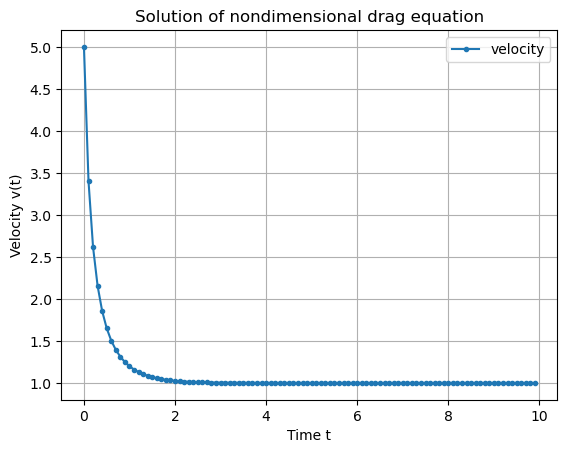

In [6]:
# parameters
tmax = 10   # final time
delta = 5   # initial velocity
dt = 5    # how often to save data

# define ODE system, via a function f(u,t)
f = lambda u,t: 1-u**2

# set up data vectors and initial condition
t = np.arange(0,tmax,0.1)  # list of times at which we wish to save the data
u0 = delta               # initial condition

# integrate the ODEs and save at times in t
u = spi.odeint(f,u0,t)

# plot solution
plt.plot(t,u,'.-',label = "velocity")
plt.title('Solution of nondimensional drag equation')
plt.xlabel('Time t')
plt.ylabel('Velocity v(t)')
plt.legend()
plt.grid()
plt.show()

We can solve systems too. Let's make a simple system out of the nonlinear drag equation, by also solving for position $x(t)$:
$$\frac{dx}{dt} = v, \qquad \frac{dv}{dt} = 1-v^2, \qquad x(0) = x_0, \quad v(0) = \delta.$$

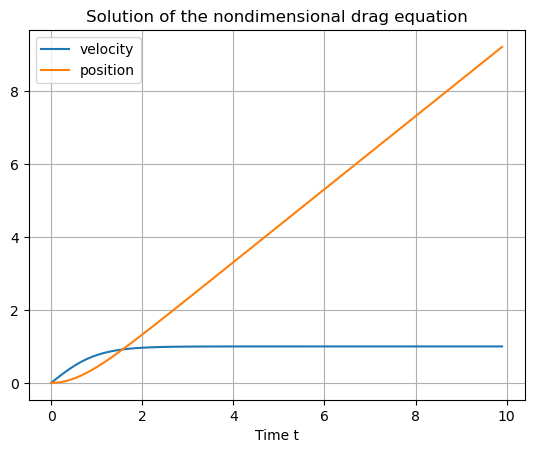

In [7]:
# parameters
tmax = 10   # final time
delta = 0   # initial velocity
x0 = 0    # initial position (in nondimensional units of V/T)
dt = 0.1    # how often to save data

# define ODE system, via a function f(u,t)
f = lambda u,t: np.array([u[1],1-u[1]**2])

# an alternative way of defining the function
def f2(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = 1-u[1]**2
    return dudt


# set up data vectors and initial condition
t = np.arange(0,tmax,0.1)  # list of times at which we wish to save the data
u0 = [x0,delta]            # initial condition

# integrate the ODEs and save at times in t
u = spi.odeint(f,u0,t)

# plot solution
plt.plot(t,u[:,1],label = "velocity")
plt.plot(t,u[:,0],label = "position")
plt.title('Solution of the nondimensional drag equation')
plt.xlabel('Time t')
plt.legend()
plt.grid()
plt.show()

### Exercise [15 minutes, in-class]
 Write code to simulate the nondimensional SIR model. Explore how the solution depends on the reproduction number (the nondimensional parameter in the model). 
 In particular, you should see a difference in the qualitative behaviour of $i^*(t)$, depending on the value of $R_0s^*(0)$. See if you can determine this relationship. 

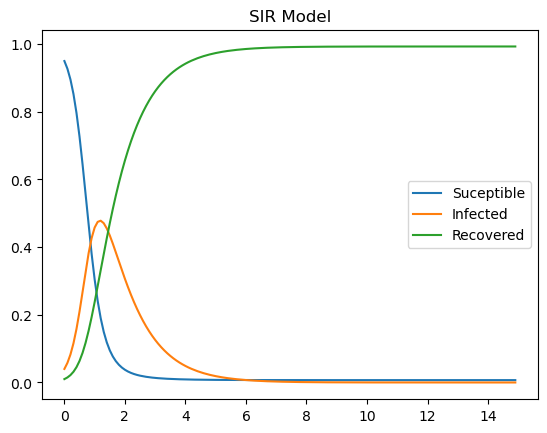

In [33]:
r0 = 5 # reproduction number

s0 = .95 # suceptible
i0 = .04 # infected
init_r = 0.01 # recovered

f = lambda u,t: np.array([-r0*u[0]*u[1], r0*u[0]*u[1] - u[1], u[1]])

tmax = 15
t = np.arange(0, tmax, .1)
u0 = [s0, i0, init_r]

u = spi.odeint(f, u0, t)

plt.plot(t, u[:,0], label="Suceptible")
plt.plot(t, u[:,1], label="Infected")
plt.plot(t, u[:,2], label="Recovered")
plt.title("SIR Model")
plt.legend()
plt.show()


## Steady-state analysis

A first step to analyzing a nonlinear system of ODEs, is to look for the steady-states. These are points where the solution is not changing, i.e. where $\frac{du}{dt} = 0$. Let's compute the steady-states for a few of the models we have considered. 

### Nonlinear drag model (dimensional)

Starting with
$$m\frac{dv}{dt} = mg - \alpha v^2,$$
we ask when does $\frac{dv}{dt}=0$. We find that this happens when
$$v_t = \sqrt{\frac{gm}{\alpha}}.$$
This is known as the *terminal velocity*. It is the velocity that the objects will eventually approach as it falls. (The terminal velocity of a human falling is about 200km/hr.)

Notice that $v_t = V$, i.e. the terminal velocity, is the scaling factor that we chose for the model!

### Lotka-Volterra equations

$$\begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta xy\\
\frac{dy}{dt} &= -\gamma y + \delta xy
\end{aligned}
$$

The steady-state occurs when 
$$\alpha x - \beta xy = 0, \qquad -\gamma y + \delta xy = 0.$$

The first equation has solutions $x=0$ and $y=\frac{\alpha}{\beta}$. 

The second equation has solutions $y=0$ and $x=\frac{\gamma}{\delta}$. 

Putting these together, the options for solutions are
$$(x,y) = (0,0), \qquad (x,y) = (\frac{\gamma}{\delta},\frac{\alpha}{\beta}).$$

In this model there are two steady-states. 

## Linear stability analysis

The next step toward analyzing a nonlinear system of equations is to consider small perturbations from the steady-states. Small perturbations can be described by the *linearization* of the system of equations, around the steady-state. Small perturbations are described by the Jacobian. 

### Nonlinear drag model

The RHS of the ODE model (once we isolate $dv/dt$) is
$$f(v) = g - \frac{\alpha}{m} v^2.$$

The "Jacobian" is just the derivative, in this scalar example: 
$$J = \frac{\partial f}{\partial v}|_{v=v_t} = - \frac{\alpha}{m} v|_{v=v_t} = - \frac{\alpha}{m} v_t.$$
We have $J < 0$, since our parameters are all positive, so the steady-state $v=v_t$ is *stable* -- small perturbations will return to the terminal velocity $v_t$. 


### Lotka-Volterra equation

(See also the write-up [here](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations#Stability_of_the_fixed_points).)

We have RHS
$$f(x,y) = \begin{pmatrix}f_1(x,y)\\f_2(x,y)\end{pmatrix} = 
\begin{pmatrix} \alpha x - \beta xy\\-\gamma y + \delta xy
 \end{pmatrix}$$

The Jacobian matrix is 
$$
J = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y}\\
 \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}& \end{pmatrix}\Big|_{(x_s,y_s)}.
$$

First consider the steady-state $(x_s,y_s) = (0,0)$. The Jacobian at this point is
$$J = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma
\end{pmatrix}.$$
The eigenvalues are 
$$\lambda_1 = \alpha, \qquad \lambda_2 = -\gamma.$$
Since one of these is positive, this steady-state is *unstable* - small perturbations from it, will move away from it. This type of critical point, with one positive and one negative eigenvalue, is called a *saddle point*. 

Next consider the steady-state $(x_s,y_s) = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. The Jacobian at this point is
$$
J = \begin{pmatrix} 
\alpha  - \beta y & -\beta x\\
\delta y & -\gamma + \delta x
\end{pmatrix}\Big|_{(x_s,y_s)} = 
\begin{pmatrix} 
0 & -\frac{\beta\gamma}{\delta}\\
\frac{\alpha \delta}{\beta} & 0 
\end{pmatrix}.$$
The eigenvalues are 
$$\lambda_1 = i\sqrt{\alpha \gamma}, \qquad \lambda_2 = -i\sqrt{\alpha \gamma}.$$

Since the eigenvalues have imaginary parts, we know the solution *spirals* around the steady-state. 

However, since these are purely imaginary, we can't tell whether it is stable or not. We could have  closed orbits around the steady-sate, or, the solution could spiral in or out. It turns out that in this case, the solution moves in closed orbits around the steady-state. Sometimes this is called a *centre*. 


## Exercise [10 minutes + 5 mins sharing]

Form groups of 3. 
- Brainstorm systems that can be modelled using ODEs.
- Make a list on the whiteboard of at least 3 different systems. 
- Try to write down a question you could ask, about each of these systems.  


You can proceed by modifying one of the models we learned about. Or, you can make up your own model. 